## Sentimental anlaysis of IMDB movie reviews using Machine learning and Deep learning algorithms.


**Abstract**
1.Sentiment analysis is the study,to classify the text based on customer reviews which can provide valuable information to improve business.
2. Previously the analysis was carried out based on the information provided
by the customers using natural language processing and machine learning.    
3. In this paper, sentiment analysis on IMDB movie reviews dataset is implemented using Machine Learning (ML) and Deep Learning (DL) approaches to measure the accuracy of the model. 
4.ML algorithms are the traditional algorithms that work in a single layer while deep learning algorithms work on multilayers and gives better output.
5. This implementation helps the researchers to identify the best algorithm for sentiment analysis.
6.The comparison of the machine learning and deep learning approaches shows that DL algorithms provide accurate and efficient result.

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
# from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
#importing the training data
data=pd.read_csv('/content/IMDB Dataset.csv')
print(data.shape)
data.head(15)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:
#Summary of the dataset
data.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Sentiment count

In [8]:
#Class Distrubution
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [9]:
## 0 as Negative and 1 as Positive
data.sentiment=data.sentiment.apply(lambda x: 0 if x=='negative' else 1)

## feature extraction.

In [10]:
## Indirect features
eng_stopwords = set(stopwords.words("english"))

data['count_sent']=data["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
data['count_word']=data["review"].apply(lambda x: len(str(x).split()))
#Unique word count
data['count_unique_word']=data["review"].apply(lambda x: len(set(str(x).split())))
#Letter count
data['count_letters']=data["review"].apply(lambda x: len(str(x)))
#punctuation count
data["count_punctuations"] =data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
data["mean_word_len"] = data["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#Word count percent in each comment:
data['word_unique_percent']=data['count_unique_word']*100/data['count_word']
#Punct percent in each comment:
data['punct_percent']=data['count_punctuations']*100/data['count_word']
#derived features
#Word count percent in each comment:
data['word_unique_percent']=data['count_unique_word']*100/data['count_word']
#derived features
#Punct percent in each comment:
data['punct_percent']=data['count_punctuations']*100/data['count_word']

In [11]:
## Reordering the columns 
data = data[['review', 'count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
       'word_unique_percent', 'punct_percent','sentiment']]
data.head()

,review,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent,sentiment
0,One of the other reviewers has mentioned that ...,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166,1
1,A wonderful little production. <br /><br />The...,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494,1
2,I thought this was a wonderful way to spend ti...,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386,1
3,Basically there's a family where a little boy ...,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826,1


## Visualization

1) Understanding Sentiment across Word count

Text(0.5, 1.0, 'Distribution of Words in review across Target var')

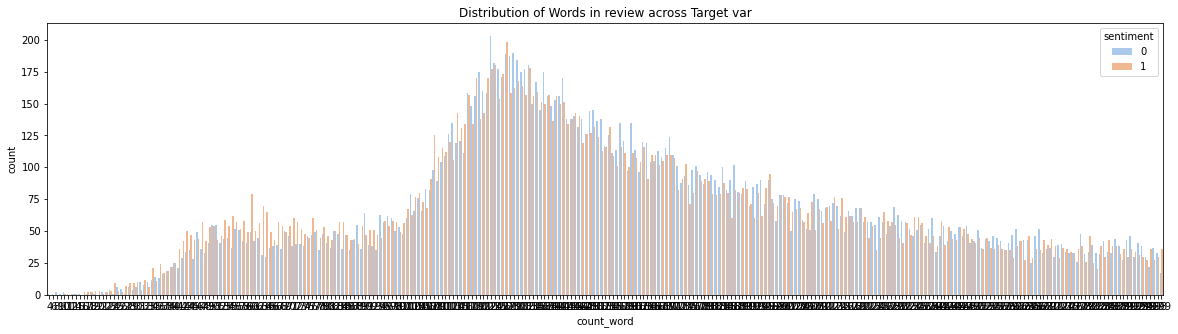

In [12]:
plt.figure(figsize=(20, 5))
data1=data[data.count_word<300]
ax = sns.countplot(x="count_word",  hue='sentiment', data=data1, palette="pastel")
plt.title("Distribution of Words in review across Target var")

2) Understanding Sentiment across Punctuation count

Text(0.5, 1.0, 'Distribution of Punctuations in review across review sentiment')

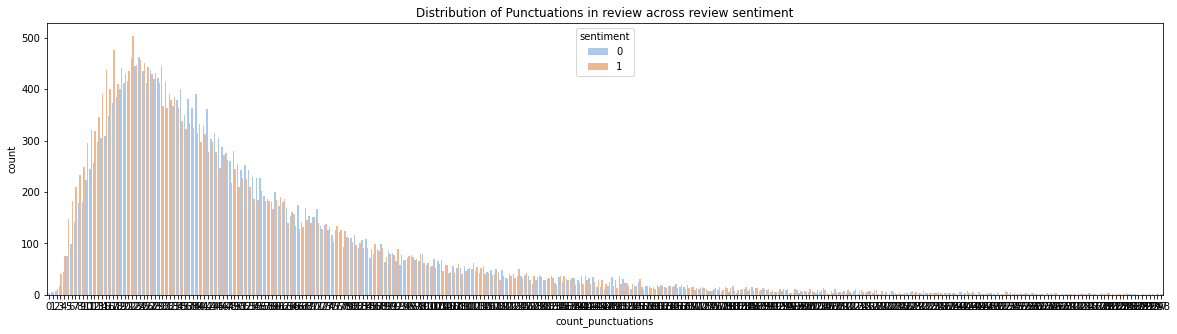

In [13]:
plt.figure(figsize=(20, 5))
data1=data[data.count_punctuations<300]
ax = sns.countplot(x="count_punctuations",  hue='sentiment', data=data1, palette="pastel")
plt.title("Distribution of Punctuations in review across review sentiment")

3) Understanding Sentiment across Stopwords count

Text(0.5, 1.0, 'Distribution of Stopwords in review across review sentiment')

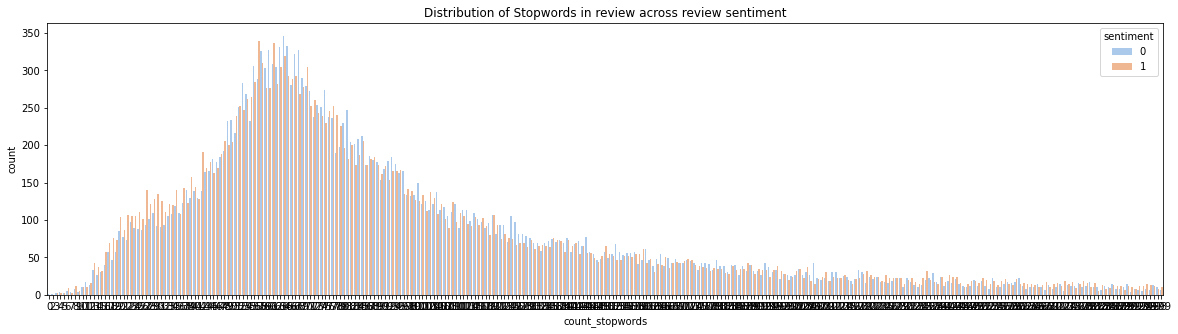

In [14]:
plt.figure(figsize=(20, 5))
data1=data[data.count_stopwords<300]
ax = sns.countplot(x="count_stopwords",  hue='sentiment', data=data1, palette="pastel")
plt.title("Distribution of Stopwords in review across review sentiment")

In [15]:
data.groupby(['sentiment'],as_index=False).mean()

,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0,1.0,229.46456,152.2662,1294.06436,53.59836,5.14632,24.72780,103.38132,4.623461,70.896372,23.447622
1,1,1.0,232.84932,152.0156,1324.79768,51.55876,4.56928,27.96804,104.31900,4.657892,70.164729,22.077985


4)Mean values on Indirect features

In [16]:
data.groupby(['sentiment'],as_index=False).mean()

,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0,1.0,229.46456,152.2662,1294.06436,53.59836,5.14632,24.72780,103.38132,4.623461,70.896372,23.447622
1,1,1.0,232.84932,152.0156,1324.79768,51.55876,4.56928,27.96804,104.31900,4.657892,70.164729,22.077985


5) Histogram for word count for both classes

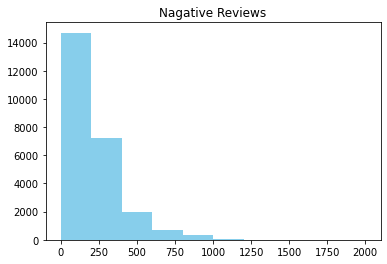

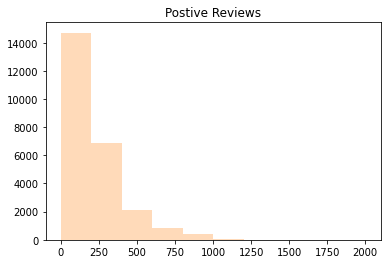

In [17]:
plt.hist(data[data['sentiment']==0]['count_word'],range=(0,2000),color='SkyBlue')
plt.title('Nagative Reviews')
plt.show()

plt.hist(data[data['sentiment']==1]['count_word'],range=(0,2000),color='PeachPuff')
plt.title('Postive Reviews')
plt.show()

## Text Preprocessing of Reviews

In [18]:
# Removing all punctuations from Text
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def word_replace(text):
    return text.replace('<br />','')


from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])



def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def preprocess(text):
    text=clean_contractions(text,mapping)
    text=text.lower()
    text=word_replace(text)
    text=remove_urls(text)
    text=remove_html(text)
    text=remove_stopwords(text)
    text=remove_punctuation(text)
#     text=stem_words(text) ## Takes too much of t
    text=lemmatize_words(text)
    
    return text

In [19]:
data["reviews_p"] = data["review"].apply(lambda text: preprocess(text))
data.head()

,review,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent,sentiment,reviews_p
0,One of the other reviewers has mentioned that ...,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166,1,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826,1,petter matteis love time money visually stunni...


Utility Function

In [20]:
def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)
    

Model based on Indirect Features


In [21]:
X=data[['count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len',
       'word_unique_percent', 'punct_percent']]
y=data['sentiment']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [23]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(40000, 11), (10000, 11), (40000,), (10000,)]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


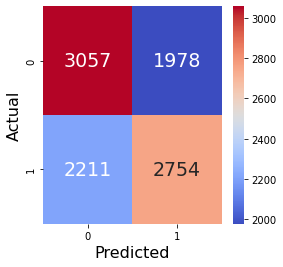


Accuracy:  0.58

F1 Score:  0.57

Report:               precision    recall  f1-score   support

           0       0.58      0.61      0.59      5035
           1       0.58      0.55      0.57      4965

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



In [24]:
# Logistic Regression with Indirect features
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(X_train, y_train)
metrics(classifier,X_test,y_test)

## Unsupervised- Pre-trained model- TextBlob

In [25]:
from textblob import TextBlob
def get_sentiment( tweet):
        analysis = TextBlob(tweet)
      
        if analysis.sentiment.polarity > 0:
            return 'positive'
        else:
            return 'negative'

In [26]:
data['TextBlob']=data['reviews_p'].apply(lambda x: get_sentiment(x))

In [27]:
print(data.TextBlob.value_counts())
print("\n",data.sentiment.value_counts())

positive    36959
negative    13041
Name: TextBlob, dtype: int64

 1    25000
0    25000
Name: sentiment, dtype: int64


In [28]:
data['TextBlob1']=data.TextBlob.apply(lambda x: 0 if x=='negative' else 1)
accuracy_score(data.sentiment,data.TextBlob1)

0.69598

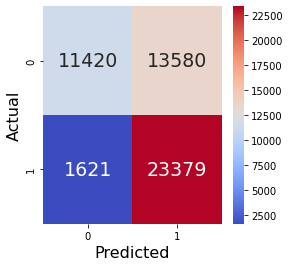

In [29]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(data.sentiment,data.TextBlob1),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()


N-gram analysis


In [30]:
texts = ' '.join(data['reviews_p'])

In [31]:
string = texts.split(" ")

In [32]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:7]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (10,5))
    return sns.barplot(x='count',y='word', data=n_gram_df)

Unigram Analysis

       word  count
0  (movie,)  98938
1   (film,)  89753
2    (one,)  52648
3   (like,)  39780
4  (would,)  30291


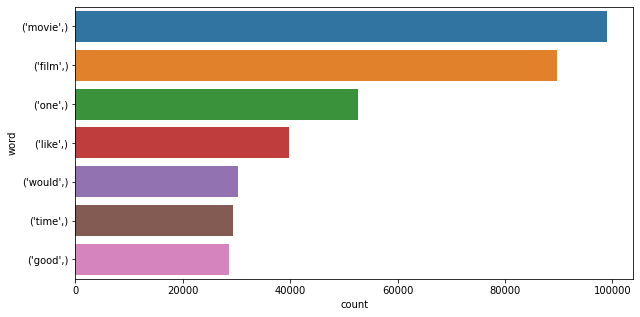

In [33]:
draw_n_gram(string,1)

Bigram Analysis

                word  count
0       (look, like)   2874
1       (ever, seen)   2534
2  (special, effect)   2198
3      (movie, ever)   1937
4  (main, character)   1875


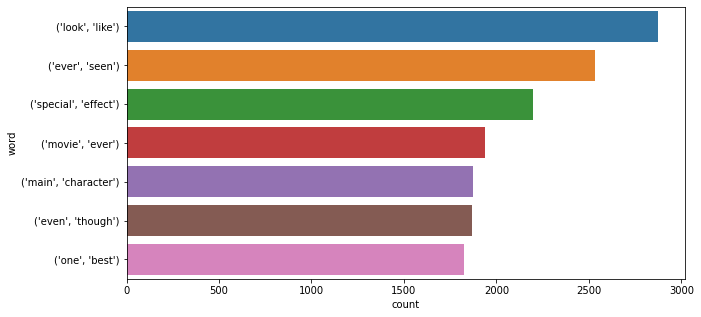

In [34]:
draw_n_gram(string,2)

Trigram Analysis

                   word  count
0   (movie, ever, seen)    828
1  (worst, movie, ever)    731
2    (film, ever, seen)    413
3   (worst, film, ever)    344
4   (movie, ever, made)    337


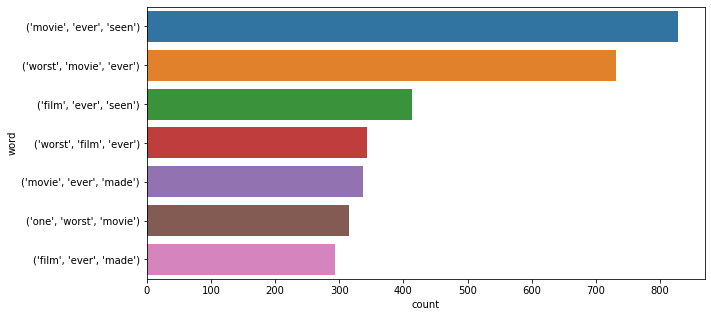

In [35]:
draw_n_gram(string,3)

## Word Embedding:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data['reviews_p'], data['sentiment'], test_size=0.2,random_state=0)

In [37]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(40000,), (10000,), (40000,), (10000,)]

1) TF-IDF

In [38]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000
)

word_vectorizer.fit(data['reviews_p'])

tfidf_train = word_vectorizer.transform(X_train)
tfidf_test = word_vectorizer.transform(X_test)

In [39]:
# word_vectorizer.get_feature_names()
print('Shape of tfidf_train:',tfidf_train.shape)
print('Shape of tfidf_test:',tfidf_test.shape)

Shape of tfidf_train: (40000, 10000)
Shape of tfidf_test: (10000, 10000)


Count Vectorizer

In [40]:
cv=CountVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',ngram_range=(1,3),max_features=10000)
cv.fit(data['reviews_p'])
cv_train=cv.transform(X_train)
cv_test=cv.transform(X_test)
print('Shape of cv_train:',cv_train.shape)
print('Shape of cv_test:',cv_test.shape)

Shape of cv_train: (40000, 10000)
Shape of cv_test: (10000, 10000)


## Machine Learning Models

## 1) Logistic Regression

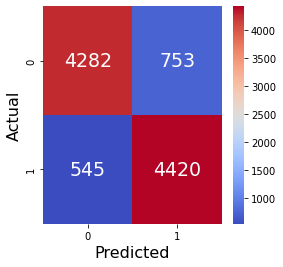


Accuracy:  0.87

F1 Score:  0.87

Report:               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5035
           1       0.85      0.89      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [41]:
# Logistic Regression with TF-IDF
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(tfidf_train, y_train)
metrics(classifier,tfidf_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


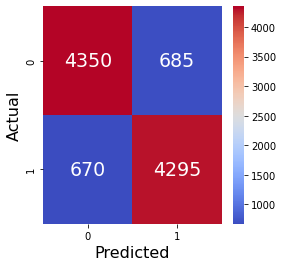


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.86      0.87      5035
           1       0.86      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [42]:
# Logistic Regression with Count Vectoriser
classifier1 = LogisticRegression(penalty='l2',C=10)
classifier1.fit(cv_train, y_train)

metrics(classifier1,cv_test,y_test)

## 2) Naive Bayes

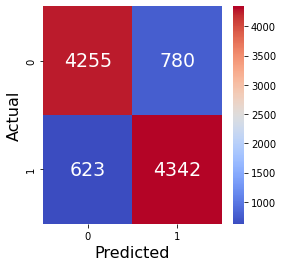


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5035
           1       0.85      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [43]:
#Naive Bayes with tf_idf
model= MultinomialNB()

model.fit(tfidf_train, y_train)
metrics(model,tfidf_test,y_test)

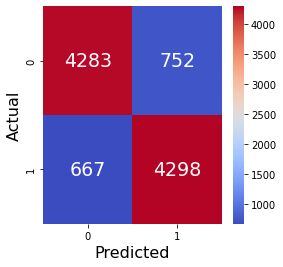


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5035
           1       0.85      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [44]:
#Naive Bayes with Count Vectorizer
modela= MultinomialNB()

modela.fit(cv_train, y_train)
metrics(modela,cv_test,y_test)

## 3) XGBoost

In [45]:
model = XGBClassifier() #Default XGBoost Model with TF_IDF
model.fit(tfidf_train, y_train)

XGBClassifier()

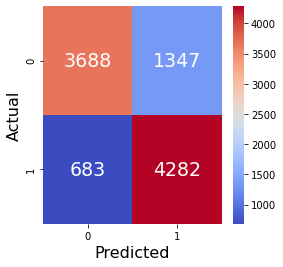


Accuracy:  0.8

F1 Score:  0.81

Report:               precision    recall  f1-score   support

           0       0.84      0.73      0.78      5035
           1       0.76      0.86      0.81      4965

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [ ]:
metrics(model,tfidf_test,y_test)

In [46]:
modelcv = XGBClassifier() #Default XGBoost Model with count Vectorizer
modelcv.fit(cv_train, y_train)

XGBClassifier()

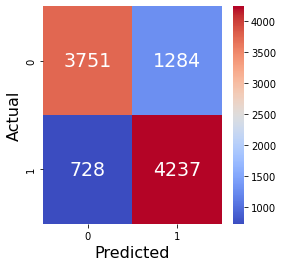


Accuracy:  0.8

F1 Score:  0.81

Report:               precision    recall  f1-score   support

           0       0.84      0.74      0.79      5035
           1       0.77      0.85      0.81      4965

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [47]:
metrics(modelcv,cv_test,y_test)

## 4) SVM

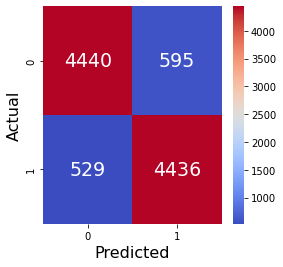


Accuracy:  0.89

F1 Score:  0.89

Report:               precision    recall  f1-score   support

           0       0.89      0.88      0.89      5035
           1       0.88      0.89      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [48]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(penalty='l2')
linear_svc.fit(tfidf_train, y_train)
metrics(linear_svc,tfidf_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


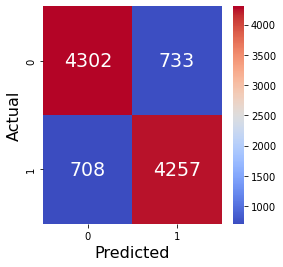


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86      5035
           1       0.85      0.86      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [49]:
#on Count Vectorizer
linear_svc1 = LinearSVC(C=0.5, random_state=42)
linear_svc1.fit(cv_train, y_train)

metrics(linear_svc1,cv_test,y_test)

## Neural Network Models

In [95]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense, Activation

In [96]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [97]:
## Out of 50k dataset, 36k for training, 4k for Validationa and 10k for testing

X_train, X_test, y_train, y_test = train_test_split(data['reviews_p'], data['sentiment'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

In [98]:
[x.shape for x in [X_train,X_valid,X_test]]

[(36000,), (4000,), (10000,)]

In [99]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data.reviews_p)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])
print(X_train1[2])

thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown lovethis would laughed one woodys comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wear prada interesting superman great comedy go see friend
[363, 158, 71, 9, 26, 356, 105, 3, 1791, 3460, 3404, 4712, 2294, 1654, 15, 134, 2, 140, 363, 130, 731, 790, 2, 1518, 15, 1138, 29, 1936, 9, 2685, 102, 1138, 3, 675, 1, 120, 48, 177, 120, 31, 1327, 105, 29, 3, 38, 2, 19, 127, 521, 4227, 924, 1138, 4198, 3557, 151, 1523, 1263, 440, 1138, 311, 269, 1939, 2267, 193, 3307, 149, 1138, 3532, 5, 144, 1138, 1213, 41, 40, 41, 233, 445, 3606, 2000, 62, 3, 46, 101, 1341, 3472,

In [100]:
print(X_train[2])

thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown lovethis would laughed one woodys comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wear prada interesting superman great comedy go see friend


In [101]:
seq_lens = [len(s) for s in X_train1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))


average length: 99.8
max length: 949


In [102]:
maxlen = 150

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

print(X_train1[2, :])

[2147 1562   48   28   53  460  264 2963 1025 4121 1085  187  232  275
 2492   59   35 2104    2  721   88   59 2944  929    7   11   41  161
  815  280    4  139  703  563  508  279  104   27    4   31 3176 2802
 1512  461 1268 1089   36    2   60   17  148   39  219 2087  451  799
  435   58   13  143   80 1138 2554 3460   53    9  851  815  124  241
 2155 4530 2083 1973   26 1151   51 1507    2    3  644 4121 1138  234
 4386   21  630  223  628   84  478  694 1337 3697    1  234  162   19
  134 1138    2   48    5  788  283  302  763 1082  184 2365 4587 1031
  134   16 4146   27  821  120  433   53  561  561   53    3 1654   53
 3167 1290  706    9    2  122 2628  866  134  149  763 1082 1449 2576
  288 3830 2740    2   29   19 1740  548 2406  274]


In [103]:
vocab_size

211094

## RNN Model

In [109]:
embedding_dim = 50
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 150, 50)           10554700  
                                                                 
 flatten_2 (Flatten)         (None, 7500)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                75010     
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,629,721
Trainable params: 10,629,721
Non-trainable params: 0
_________________________________________________________________


In [93]:
num_words = 15000
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(num_words, 32, input_length = len(X_train[0])))
model.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

print(model.summary())
model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 130, 32)           480000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
history = model.fit(X_train1, y_train,epochs=10,verbose=True,validation_data=(X_valid1, y_valid),batch_size=1000,callbacks=[callback])

Epoch 1/10
36/36 [==============================] - 6s 150ms/step - loss: 0.6848 - accuracy: 0.5785 - val_loss: 0.6553 - val_accuracy: 0.7360
Epoch 2/10
36/36 [==============================] - 5s 148ms/step - loss: 0.4621 - accuracy: 0.8263 - val_loss: 0.3296 - val_accuracy: 0.8618
Epoch 3/10
36/36 [==============================] - 7s 183ms/step - loss: 0.2674 - accuracy: 0.8935 - val_loss: 0.2902 - val_accuracy: 0.8767
Epoch 4/10
36/36 [==============================] - 5s 152ms/step - loss: 0.2132 - accuracy: 0.9172 - val_loss: 0.2864 - val_accuracy: 0.8792
Epoch 5/10
36/36 [==============================] - 6s 153ms/step - loss: 0.1775 - accuracy: 0.9348 - val_loss: 0.2968 - val_accuracy: 0.8770
Epoch 6/10
36/36 [==============================] - 5s 152ms/step - loss: 0.1416 - accuracy: 0.9544 - val_loss: 0.3011 - val_accuracy: 0.8788


In [111]:
accuracy_score(y_test, (model.predict(X_test1) > 0.5).astype("int32"))

0.8811

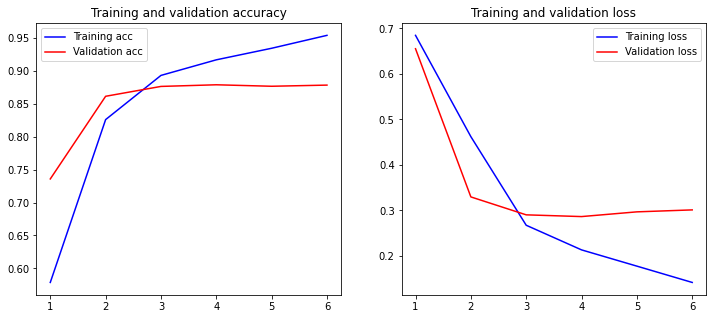

In [112]:
plot_history(history)

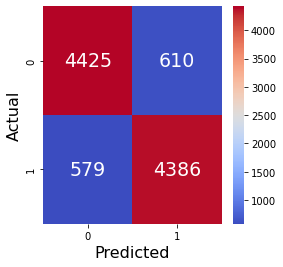

In [113]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, (model.predict(X_test1) > 0.5).astype("int32")),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()

## LSTM Model

In [65]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           10554700  
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,615,201
Trainable params: 10,615,201
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

Epoch 1/10
141/141 [==============================] - 137s 954ms/step - loss: 0.6096 - accuracy: 0.6220 - val_loss: 0.3893 - val_accuracy: 0.8482
Epoch 2/10
141/141 [==============================] - 133s 945ms/step - loss: 0.3328 - accuracy: 0.8732 - val_loss: 0.3221 - val_accuracy: 0.8702
Epoch 3/10
141/141 [==============================] - 143s 1s/step - loss: 0.2679 - accuracy: 0.8993 - val_loss: 0.2919 - val_accuracy: 0.8745
Epoch 4/10
141/141 [==============================] - 171s 1s/step - loss: 0.2372 - accuracy: 0.9134 - val_loss: 0.3279 - val_accuracy: 0.8775
Epoch 5/10
141/141 [==============================] - 138s 977ms/step - loss: 0.2250 - accuracy: 0.9192 - val_loss: 0.2907 - val_accuracy: 0.8813
Epoch 6/10
141/141 [==============================] - 134s 954ms/step - loss: 0.2189 - accuracy: 0.9206 - val_loss: 0.2944 - val_accuracy: 0.8790
Epoch 7/10
141/141 [==============================] - 131s 929ms/step - loss: 0.2054 - accuracy: 0.9267 - val_loss: 0.3685 - val_a

In [67]:
accuracy_score(y_test, (model.predict(X_test1) > 0.5).astype("int32"))

0.8743

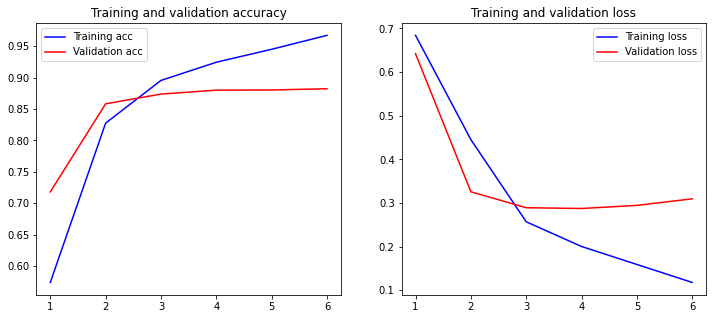

In [68]:
plot_history(history)

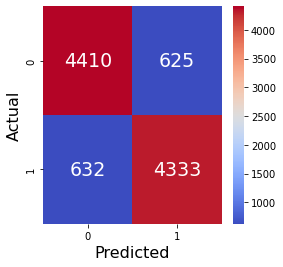

In [69]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, (model.predict(X_test1) > 0.5).astype("int32")),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()

## CNN Model

In [70]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 50)           10554700  
                                                                 
 conv1d (Conv1D)             (None, 150, 32)           4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 32)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,612,833
Trainable params: 10,612,833
Non-trainable params: 0
__________________________________________

In [71]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

Epoch 1/10
141/141 [==============================] - 62s 424ms/step - loss: 0.4818 - accuracy: 0.7310 - val_loss: 0.3001 - val_accuracy: 0.8740
Epoch 2/10
141/141 [==============================] - 60s 423ms/step - loss: 0.2549 - accuracy: 0.9007 - val_loss: 0.2773 - val_accuracy: 0.8838
Epoch 3/10
141/141 [==============================] - 59s 420ms/step - loss: 0.2085 - accuracy: 0.9209 - val_loss: 0.2926 - val_accuracy: 0.8855
Epoch 4/10
141/141 [==============================] - 59s 418ms/step - loss: 0.1773 - accuracy: 0.9359 - val_loss: 0.3287 - val_accuracy: 0.8800


In [72]:
accuracy_score(y_test, (model.predict(X_test1) > 0.5).astype("int32"))

0.8741

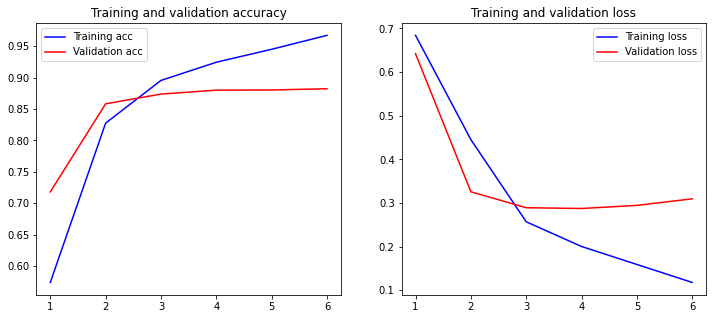

In [73]:
plot_history(history)